In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
fg = pd.read_csv("fear_greed_index.csv")
hist = pd.read_csv("historical_data.csv")

In [3]:
fg['date'] = pd.to_datetime(fg['timestamp'], unit='s').dt.date
hist['date'] = pd.to_datetime(hist['Timestamp'], unit='ms').dt.date

In [4]:
daily = hist.groupby("date").agg(
    total_volume = ("Size USD", "sum"),
    avg_pnl = ("Closed PnL", "mean"),
    trades = ("Size USD", "count")
).reset_index()

In [5]:
merged = pd.merge(daily, fg[['date', 'classification']], on='date', how='left')

merged.head()

,date,total_volume,avg_pnl,trades,classification
0,1970-01-01,110.97,0.000000,1,NaN
1,2023-03-28,477.00,0.000000,3,Greed
2,2023-11-14,11555429.76,0.148807,1045,Greed
3,2024-03-09,39406770.25,25.418772,6962,Extreme Greed
4,2024-07-03,21505667.61,24.411566,7097,Neutral


In [6]:
merged.to_csv("merged.csv", index=False)
files.download("merged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
merged['classification'].value_counts()


,count
classification,
Greed,3
Extreme Greed,1
Neutral,1
Fear,1


In [8]:
merged.describe()


,total_volume,avg_pnl,trades
count,8.000000e+00,8.000000,8.000000
mean,1.035883e+08,39.034912,13407.375000
std,1.582178e+08,49.124093,21873.665366
min,1.109700e+02,0.000000,1.000000
25%,8.666692e+06,0.111605,784.500000
50%,3.045622e+07,24.915169,7029.500000
75%,1.117979e+08,52.782668,12693.000000
max,4.277346e+08,142.054099,65885.000000


In [9]:
import os
os.makedirs("outputs", exist_ok=True)

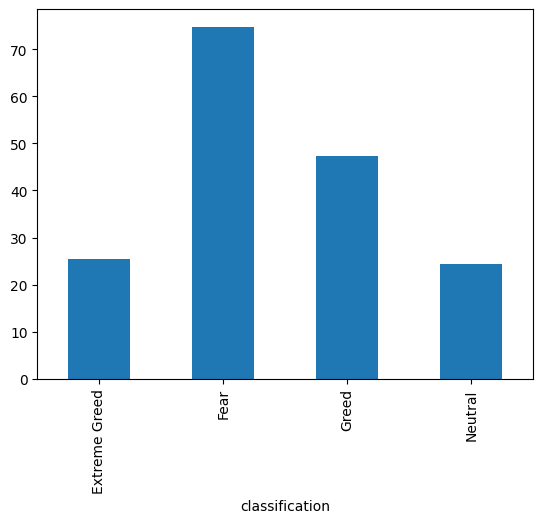

In [10]:
merged.groupby('classification')['avg_pnl'].mean().plot(kind='bar')
plt.savefig("outputs/avg_pnl.png")

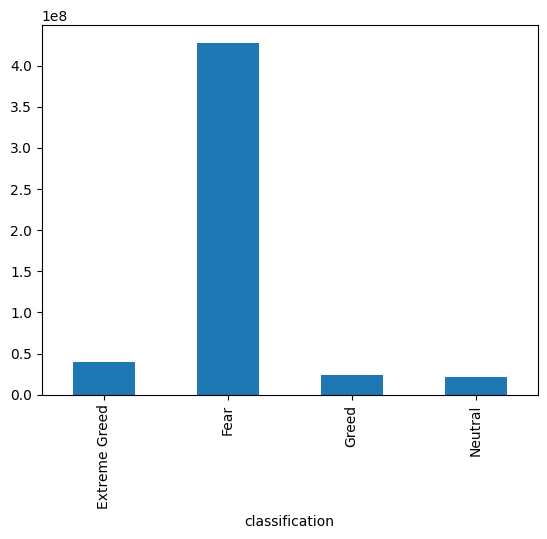

In [11]:
merged.groupby('classification')['total_volume'].mean().plot(kind='bar')
plt.savefig("outputs/volume.png")

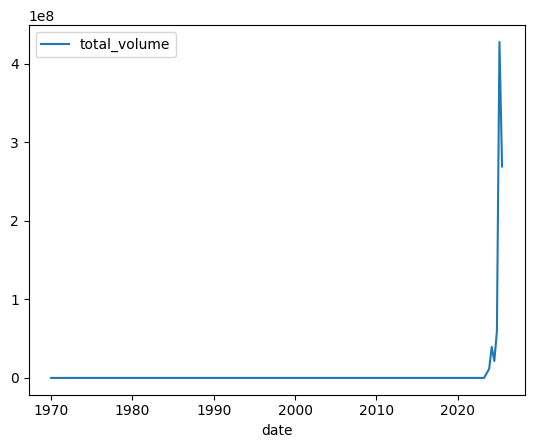

In [12]:
merged.plot(x='date', y='total_volume')
plt.savefig("outputs/volume_time.png")

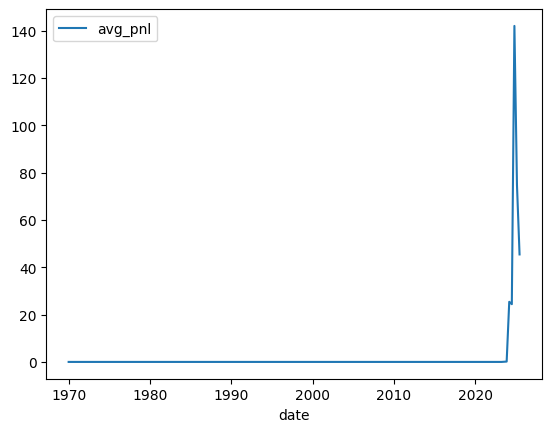

In [13]:
merged.plot(x='date', y='avg_pnl')
plt.savefig("outputs/pnl_time.png")